## Import Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
# use pandas to load data into a DataFrame
df = pd.read_csv("preprocessed_datasets/important_features.csv")
df.shape # (rows, columns)

(35970, 8)

In [5]:
df.head()

,DC024,DC205,DC214,DC220,DC235,DC109,DC142a,DC201
0,11.0,16.0,36.0,80.0,1.0,12.0,60.0,1.0
1,11.0,31.0,36.0,44.0,1.0,31.0,70.0,1.0
2,11.0,12.0,36.0,35.0,1.0,11.0,75.0,1.0
3,11.0,12.0,36.0,79.0,1.0,11.0,85.0,1.0
4,11.0,12.0,36.0,37.0,1.0,11.0,65.0,1.0


In [6]:
target_column = 'DC201'

In [7]:
df[target_column] = df[target_column].astype(int)

In [8]:
df.head()

,DC024,DC205,DC214,DC220,DC235,DC109,DC142a,DC201
0,11.0,16.0,36.0,80.0,1.0,12.0,60.0,1
1,11.0,31.0,36.0,44.0,1.0,31.0,70.0,1
2,11.0,12.0,36.0,35.0,1.0,11.0,75.0,1
3,11.0,12.0,36.0,79.0,1.0,11.0,85.0,1
4,11.0,12.0,36.0,37.0,1.0,11.0,65.0,1


In [9]:
df.nunique()

DC024        34
DC205        16
DC214        24
DC220        88
DC235     10447
DC109        19
DC142a      414
DC201         2
dtype: int64

In [10]:
target_list = df[target_column].value_counts()
target_list = target_list.index.tolist()
target_list

[1, 0]

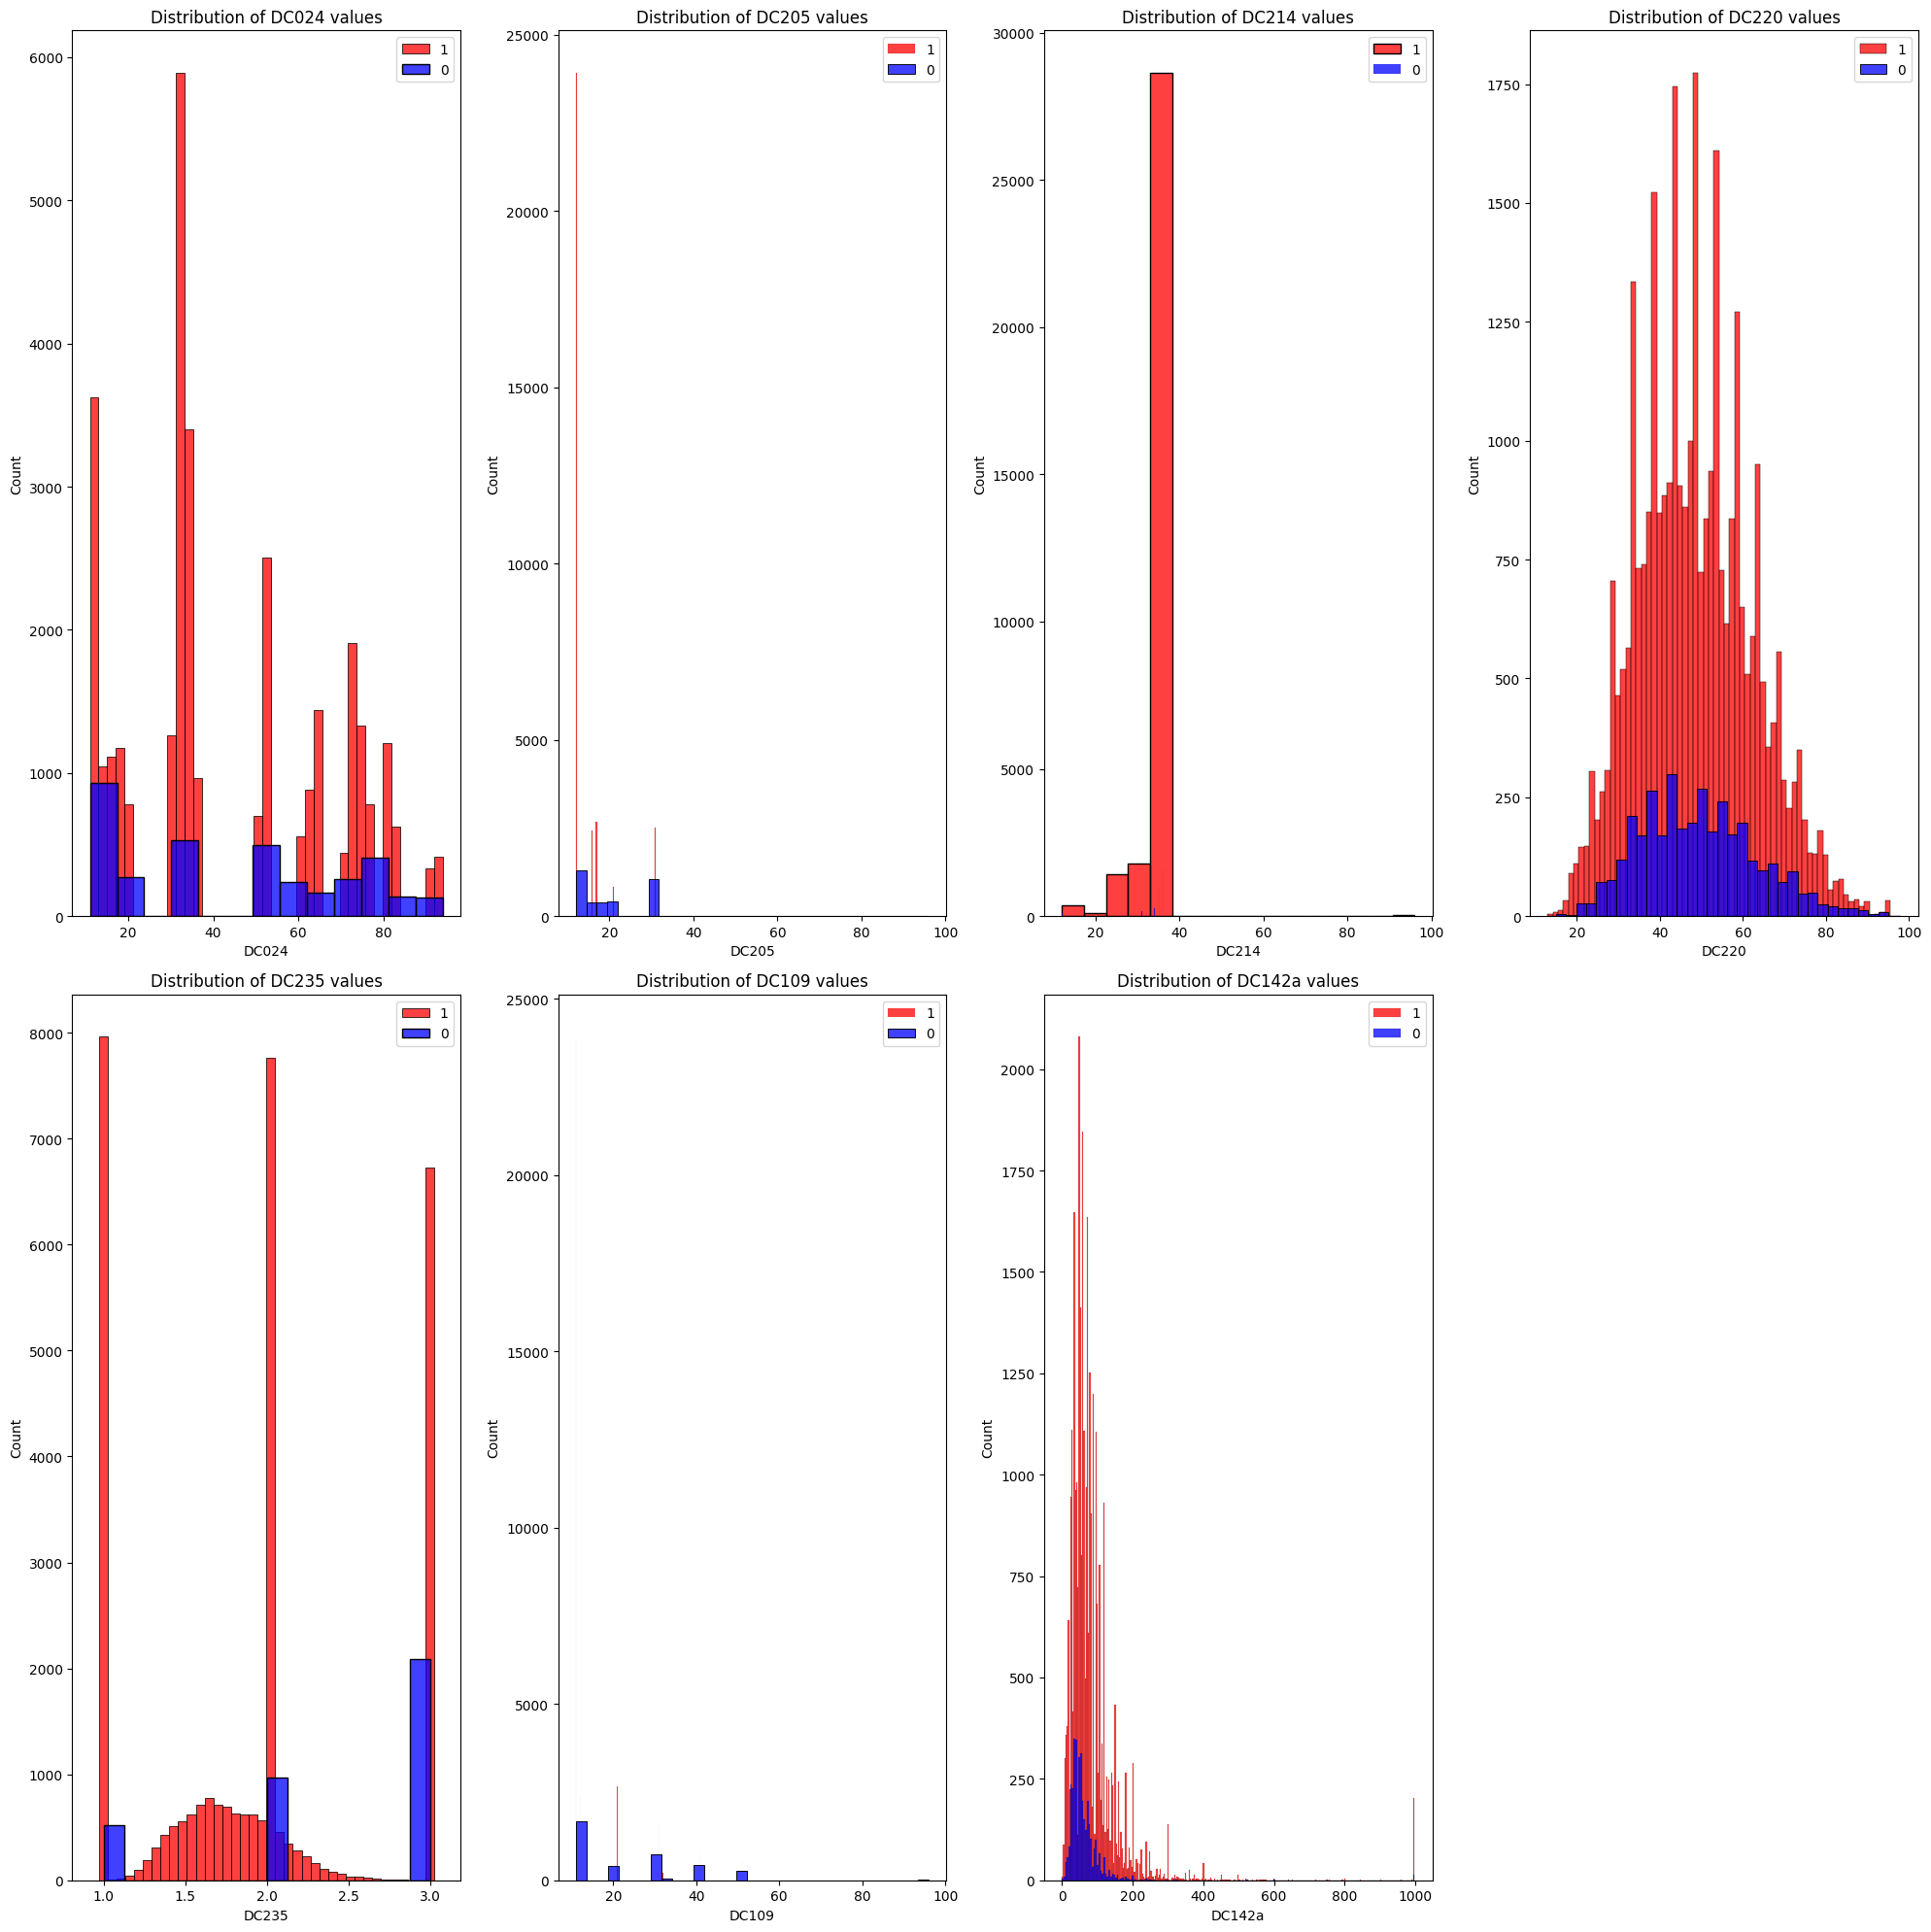

In [11]:
# Distribution of features
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

target_value = []

for target in target_list:
    query = str(target_column) + ' == ' + str(target)
    target_value.append(df.query(query))

# colors = ['salmon', 'red', 'blue', 'lightblue', 'orange', 'black', 'gray', 'pink', 'navy', 'white']
colors = ['red', 'blue']

fig = plt.figure(figsize=(20,20))

for ax,column in enumerate(df.columns[:7]):
    plt.subplot(2,4,ax+1)
    plt.title(f'Distribution of {column} values')
    for i, target in enumerate(target_value):
        sns.histplot(x=target[column],label=target_list[i], color=colors[i])    
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()

In [12]:
y_train = np.array(df[target_column]) # value dari label
df = df.drop(target_column, axis=1) # drop target
feature_list = list(df.columns) # list column
X_train = np.array(df) # df dalam bentuk numpy array

### Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

## Split 8:2

In [14]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_SEED = 42

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_norm, y_train, test_size = TEST_SIZE, random_state = RANDOM_SEED)

In [15]:
train = pd.DataFrame(X_train)
train

,0,1,2,3,4,5,6
0,-0.433646,0.167169,0.198466,0.475765,-0.723851,-0.364586,2.933031
1,-1.069637,-0.492864,0.198466,0.986235,-0.797005,-0.468786,0.519184
2,-0.476045,-0.492864,-0.032896,-0.399326,0.080749,-0.468786,0.190023
3,-0.476045,-0.492864,0.198466,0.621614,-1.308847,-0.468786,-0.578020
4,-1.239235,0.992210,0.429829,0.038220,-0.068907,2.657230,0.146134
...,...,...,...,...,...,...,...
28771,-0.391246,-0.492864,-0.032896,-0.836871,-1.308847,-0.468786,-0.029418
28772,-1.112037,-0.492864,0.198466,-0.107629,-0.281208,-0.468786,0.146134
28773,-0.476045,0.167169,0.198466,-1.055644,-1.308847,-0.364586,0.936121
28774,-1.366434,0.167169,0.429829,1.788401,0.080749,-0.364586,-0.215943


In [16]:
test = pd.DataFrame(X_test)
test

,0,1,2,3,4,5,6
0,0.838337,-0.492864,0.429829,-0.691023,0.080749,-0.468786,-0.303719
1,-1.324034,-0.492864,0.198466,0.840386,-0.698796,-0.468786,0.277799
2,0.923136,-0.492864,0.429829,-0.836871,0.256589,-0.468786,-0.248859
3,2.025521,-0.492864,0.429829,-0.399326,0.080749,-0.468786,-0.139138
4,-0.348847,-0.492864,-0.726983,0.548689,1.470345,-0.468786,-0.117194
...,...,...,...,...,...,...,...
7189,0.880737,-0.492864,0.198466,0.402841,-0.122990,-0.468786,-0.029418
7190,1.389530,-0.492864,0.198466,0.184068,0.152523,-0.468786,0.277799
7191,-1.196836,0.167169,0.429829,-0.691023,0.080749,-0.364586,-0.468299
7192,1.601527,0.332177,-2.346519,-0.909795,0.548510,0.573219,-0.578020


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

model = SVC(class_weight='balanced')

# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','poly','linear']} 
# param_grid = {'C': [0.009], 
#               'gamma': [1.2],
#               'kernel': ['sigmoid']} 

# best: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=5)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.904 total time=  15.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.904 total time=  12.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.902 total time=  15.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.904 total time=  15.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.902 total time=  14.8s


In [ ]:
from sklearn.metrics import classification_report

model = SVC(C=0.1, gamma=1, kernel='poly')
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
df_test = pd.read_csv("datasets/test.csv")
df_imp_test = df_test.iloc[:, [0,2,11,16,22,36,37]]
X_test_real = np.array(df_imp_test)
X_test_real = scaler.fit_transform(X_test_real)

In [ ]:
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

## Cross Validation

In [ ]:
# from numpy import mean
# from numpy import std
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# FOLD = 15
# ITERATIONS = 5

In [ ]:
# # param_grid = {'C': [0.009], 
#             #   'gamma': [1.2],
#             #   'kernel': ['rbf']}

# model = SVC(C=0.1, gamma=1, kernel='poly')
# # cv = RepeatedStratifiedKFold(n_splits=FOLD, n_repeats=ITERATIONS, random_state=RANDOM_SEED)
# n_scores = cross_val_score(model, X_train, y_train, scoring='f1_macro', cv=FOLD, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 1.000 (0.000)
